<a href="https://colab.research.google.com/github/rhuancborges/praticas-programacaoMatematica/blob/main/problema3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 1 (AP1)
### GCC118 - Programação Matemática


**Nome**: Rhuan Campideli Borges (202210075)

**Turma**: 10A


# Enunciado - Problema 3

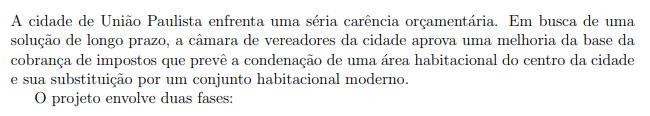

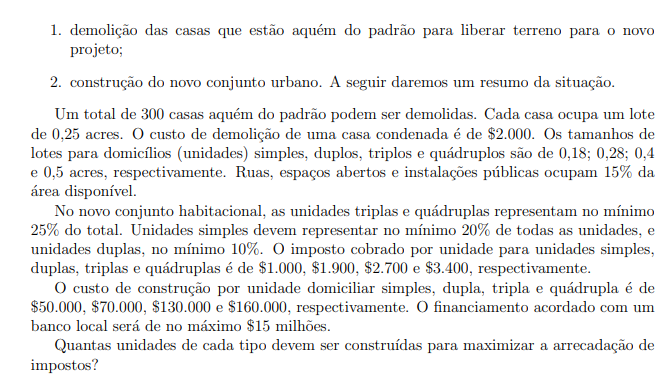

# Modelagem Matemática

## Dados

Para iniciar a nossa modelagem, podemos retirar, do enunciado, alguns dados importantes:

* $D = 300$ -> quantidade máxima de casas que podem ser demolidas;
* $c_D = R\$2.000,00$ -> custo de demolir uma casa;
* $o_D = 0,25$ -> espaço (em acres) que uma casa (a ser demolida) ocupa;
* $t_i$ -> tamanho dos lotes de cada tipo de casa do conjunto habitacional a ser construído;
* $p_{rua} = 0,15$ (15\%) -> porcentagem do espaço disponível que ruas, espaços abertos e iluminações públicas ocupam;
* $p_{tq} = 0,25$ (25\%) -> porcentagem mínima do total que as unidades triplas e quádruplas representam;
* $p_s = 0,2$ (20\%) -> porcentagem mínima do total que as unidades simples representam;
* $p_d = 0,1$ (10\%) -> porcentagem mínima do total que as unidades duplas representam;
* $I_i$ -> imposto arrecadado para cada tipo de casa;
* $c_i$ -> custo de construção de cada tipo de casa;
* $F = R\$15.000.000,00$ -> valor do financiamento (verba disponível).

**Vetor de tamanho de lote($t_i$)**:
$$
\mathbf{t_i} = \begin{pmatrix} 0,18 \\ 0,28 \\ 0,4 \\ 0,5 \end{pmatrix}
$$

\\

**Vetor de imposto($I_i$)**:
$$
\mathbf{I_i} = \begin{pmatrix} 1.000,00 \\ 1.900,00 \\ 2.700,00 \\ 3.400,00 \end{pmatrix}
$$

\\

**Vetor de custo de construção($c_i$)**:
$$
\mathbf{c_i} = \begin{pmatrix} 50.000,00 \\ 70.000,00 \\ 130.000,00 \\ 160.000,00 \end{pmatrix}
$$

\\

## Variáveis de decisão

As variáveis do problema (e o que queremos determinar) consistem nas quantidades de cada tipo de casa, do conjuto habitacional, a serem construídas. Além disso, tem-se como variável a quantidade de casas a serem demolidas.

* $x_i$ -> quantidade de casas de cada tipo (simples, dupla, tripla, quádrupla) a serem construídas;
* $y$ -> quantidade de casas demolidas.

**Vetor de quantidade de casas($x_i$)**:
$$
\mathbf{x_i} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix}
$$

\\
### Tipo

As variáveis são contínuas. Ou seja, $x_1 \geq 0, x_2 \geq 0, ..., x_4 \geq 0$.

## Objetivo e Função

O objetivo do problema é maximizar a arrecadação de impostos. Desse modo, devemos **maximizar** a seguinte função:

$$
f(x) = \sum_{i=1}^{4} I_i*x_i = 1000x_1+1900x_2+2700x_3+3400x_4
$$

## Restrições

**Restrição sobre o limite máximo de casas a serem demolidas**

Segundo o enunciado, podem ser demolidas, no máximo, 300 casas.
$$
y \leq D → y \leq 300
$$

\\

**Restrição sobre ocupação do espaço**

A soma da quantidade de acres ocupados por cada tipo de casa construída não deve ultrapassar a quantidade de espaço disponível. A quantidade de espaço disponível consiste em 85% do espaço liberado pela demolição das casas "antigas", já que 15% desse espaço é ocupado por ruas, espaços abertos e iluminação pública.
$$
\sum_{i=1}^{4} t_i * x_i \leq (1-p_{rua})*o_D*y →\\
0,18x_1+0,28x_2+0,4x_3+0,5x_4 \leq 0,85*0,25*y
$$

\\

**Restrição sobre o custo**

A soma dos custos de construção com o custo de demolição não deve ultrapassar o valor do financiamento (verba disponível).
$$
c_D*y + \sum_{i=1}^{4}c_i*x_i \leq F → \\
2000y + 50000x_1+70000x_2+130000x_3+160000x_4 \leq 15000000
$$

\\

**Restrição sobre proporção das unidades em relação ao total**

As unidades simples devem representar no mínimo 20% do total de unidades. As unidades duplas devem representar no mínimo 10% do total de unidades. As unidades triplas e quádruplas devem representar, juntas, no mínimo 25% do total de unidades.

* $x_1 \geq p_s(x_1+x_2+x_3+x_4) → x_1 \geq 0,2(x_1+x_2+x_3+x_4)$;
* $x_2 \geq p_d(x_1+x_2+x_3+x_4) → x_2 \geq 0,1(x_1+x_2+x_3+x_4)$;
* $x_3+x_4 \geq p_{tq}(x_1+x_2+x_3+x_4) → \\ x_3+x_4 \geq 0,25(x_1+x_2+x_3+x_4) $.

# Instalando PuLP

In [1]:
!pip install pulp
import pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 21.1 MB/s eta 0:00:00


# Parâmetros

* Tipos de casas
* Quantidade máxima de casas que podem ser demolidas;
* Custo de demolir uma casa;
* Espaço (em acres) que uma casa (a ser demolida) ocupa;
* Tamanho dos lotes de cada tipo de casa do conjunto habitacional a ser construído;
* Porcentagem do espaço disponível que ruas, espaços abertos e iluminações públicas ocupam;
* Porcentagem mínima do total que as unidades triplas e quádruplas representam;
* Porcentagem mínima do total que as unidades simples representam;
* Porcentagem mínima do total que as unidades duplas representam;
* Imposto arrecadado para cada tipo de casa;
* Custo de construção de cada tipo de casa;
* Valor do financiamento (verba disponível).

In [4]:
tipos = [1,2,3,4]

max_demolicao = 300

custo_demolicao = 2000

espaco_casa_demolida = 0.25

tamanho_lote = {
    1: 0.18,
    2: 0.28,
    3: 0.4,
    4: 0.5
}

p_rua = 0.15

p_tq = 0.25

p_s = 0.2

p_d = 0.1

imposto = {
    1: 1000,
    2: 1900,
    3: 2700,
    4: 3400
}

custo = {
    1: 50000,
    2: 70000,
    3: 130000,
    4: 160000
}

financiamento = 15000000

# Declaração do objeto do modelo matemático

In [5]:
modelo =  pulp.LpProblem("casas", pulp.LpMaximize)

# Variáveis de decisão

* $x_1 \geq 0, x_2 \geq 0, ..., x_4 \geq 0$ -> quantidade de casas de cada tipo (simples, dupla, tripla, quádrupla) a serem construídas;
* $y \geq 0$ -> quantidade de casas demolidas.

In [6]:
x_var = pulp.LpVariable.dicts("x", tipos, lowBound=0)
y = pulp.LpVariable("y", lowBound=0)

# Função Objetivo

Maximizar $f(x) = \sum_{i=1}^{4} I_i*x_i = 1000x_1+1900x_2+2700x_3+3400x_4$


In [8]:
modelo += pulp.lpSum([imposto[i]*x_var[i]]for i in tipos)

# Restrições

**Restrição sobre o limite máximo de casas a serem demolidas**

Segundo o enunciado, podem ser demolidas, no máximo, 300 casas.
$$
y \leq D → y \leq 300
$$

\\

In [7]:
modelo += y <= max_demolicao

**Restrição sobre ocupação do espaço**

$$
\sum_{i=1}^{4} t_i * x_i \leq (1-p_{rua})*o_D*y →\\
0,18x_1+0,28x_2+0,4x_3+0,5x_4 \leq 0,85*0,25*y
$$

\\

In [9]:
modelo += pulp.lpSum([tamanho_lote[i]*x_var[i]] for i in tipos) <= (1-p_rua)*espaco_casa_demolida*y

**Restrição sobre o custo**

$$
c_D*y + \sum_{i=1}^{4}c_i*x_i \leq F → \\
2000y + 50000x_1+70000x_2+130000x_3+160000x_4 \leq 15000000
$$


In [10]:
modelo += custo_demolicao*y + pulp.lpSum([custo[i]*x_var[i]] for i in tipos) <= financiamento

**Restrição sobre proporção das unidades em relação ao total**

* $x_1 \geq p_s(x_1+x_2+x_3+x_4) → x_1 \geq 0,2(x_1+x_2+x_3+x_4)$;
* $x_2 \geq p_d(x_1+x_2+x_3+x_4) → x_2 \geq 0,1(x_1+x_2+x_3+x_4)$;
* $x_3+x_4 \geq p_{tq}(x_1+x_2+x_3+x_4) → \\ x_3+x_4 \geq 0,25(x_1+x_2+x_3+x_4) $.

In [11]:
modelo += x_var[1] >= p_s*(x_var[1]+x_var[2]+x_var[3]+x_var[4])
modelo += x_var[2] >= p_d*(x_var[1]+x_var[2]+x_var[3]+x_var[4])
modelo += x_var[3]+x_var[4] >= p_tq*(x_var[1]+x_var[2]+x_var[3]+x_var[4])

# Resolvendo o problema

In [12]:
status = modelo.solve()

# Imprimindo solução do problema

In [13]:
print("Status: ", pulp.LpStatus[status])
print("Função Objetivo: ", modelo.objective.value())
print("Soluções")
for i in tipos:
  print(f"\tCasas do tipo {i} construídas -> Quantidade: {x_var[i].value()}")
print(f"\tCasas demolidas -> Quantidade: {y.value()}")


Status:  Optimal
Função Objetivo:  343965.1538
Soluções
	Casas do tipo 1 construídas -> Quantidade: 35.829704
	Casas do tipo 2 construídas -> Quantidade: 98.531685
	Casas do tipo 3 construídas -> Quantidade: 44.787129
	Casas do tipo 4 construídas -> Quantidade: 0.0
	Casas demolidas -> Quantidade: 244.48504
